# Transformación de datos

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Septiembre de 2025  
**Versión:** 1.0  

---

## Descripción

Este notebook presenta las actividades vinculadas con el proceso de transformación de datos.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- pandas (2.2.2)
- numpy (1.26.4)
- matplotlib (3.8.0)
- seaborn (0.13.0)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

# Concepto - Tansformación de datos en `Machine Learning`

En un proyecto de machine learning, los datos que se recopilan suelen estar en formatos muy variados: números, texto, fechas, categorías.

Para que un algoritmo pueda ***aprender*** de esos datos, muchas veces se deben ***transformar***.

Una ***transformación de datos*** es un cambio controlado en la representación de los datos en donde se busca:

- Estandarizar las escalas.
- Codificar variables categóricas en números.
- Reducir ruido o valores extremos.
- Crear nuevas variables más informativas.

 En resunen, la transformación de datos convierte la información cruda en insumos útiles para los algoritmos.

In [ ]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/Fundamentos-de-Machine-Learning/master/data/CarPrice.csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

In [ ]:
data = pd.read_csv("CarPrice.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Identificar el tipo de variables

**Cuantitativas:** `horsepower`, `enginesize`, `price`.

**Categóricas:** `CarName`, `fueltype`.

In [ ]:
selected_data = data[["CarName", "fueltype", "enginesize", "horsepower", "price"]]
selected_data.head()

,CarName,fueltype,enginesize,horsepower,price
0,alfa-romero giulia,gas,130,111,13495.0
1,alfa-romero stelvio,gas,130,111,16500.0
2,alfa-romero Quadrifoglio,gas,152,154,16500.0
3,audi 100 ls,gas,109,102,13950.0
4,audi 100ls,gas,136,115,17450.0


# Estandarización de datos cuantitativos

Los algoritmos como regresión logística o redes neuronales funcionan mejor si las variables numéricas están en escalas comparables.

**Normalización:** llevar los valores a un rango fijo (ejemplo: 0 a 1).

**Estandarización:** transformar a media 0 y desviación estándar 1.

## `MinMaxScaler`

In [ ]:
data_for_min_max = selected_data.copy()

In [ ]:
# Crea el objeto para escalar
scaler = MinMaxScaler()
# Aplica el algoritmo de escalado
scaled_data = scaler.fit_transform(data_for_min_max[["enginesize", "horsepower"]])

In [ ]:
# Agrega las columnas al dataframe
data_for_min_max.loc[:, ["enginesize_scaled", "horsepower_scaled"]] = scaled_data
data_for_min_max.head()

,CarName,enginesize,horsepower,price,fueltype_gas,enginesize_scaled,horsepower_scaled
0,alfa-romero giulia,130,111,13495.0,True,0.260377,0.262500
1,alfa-romero stelvio,130,111,16500.0,True,0.260377,0.262500
2,alfa-romero Quadrifoglio,152,154,16500.0,True,0.343396,0.441667
3,audi 100 ls,109,102,13950.0,True,0.181132,0.225000
4,audi 100ls,136,115,17450.0,True,0.283019,0.279167


## `StandardScaler`

In [ ]:
data_std = selected_data.copy()
# Crea el ojeto para escalar
scaler_std = StandardScaler()
# Aplica algoritmo de escalado
scaled_data_std = scaler_std.fit_transform(data_std[["enginesize", "horsepower"]])
data_std.loc[:, ["enginesize_scaled", "horsepower_scaled"]] = scaled_data_std

In [ ]:
data_std.head()

,CarName,fueltype,enginesize,horsepower,price,enginesize_scaled,horsepower_scaled
0,alfa-romero giulia,gas,130,111,13495.0,0.074449,0.174483
1,alfa-romero stelvio,gas,130,111,16500.0,0.074449,0.174483
2,alfa-romero Quadrifoglio,gas,152,154,16500.0,0.604046,1.264536
3,audi 100 ls,gas,109,102,13950.0,-0.431076,-0.053668
4,audi 100ls,gas,136,115,17450.0,0.218885,0.275883


# Generación de nuevas variables `feature engineering`

Se pueden crear nuevas variables a partir de las existentes, por ejemplo:

+ Relación horsepower/enginesize.

+ Clasificación de price en segmentos (bajo, medio, alto).

In [ ]:
selected_data["hp_per_engine"] = selected_data["horsepower"] / (selected_data["enginesize"] + 1e-6)  # evitar división por 0
selected_data.head()

,CarName,enginesize,horsepower,price,fueltype_gas,hp_per_engine
0,alfa-romero giulia,130,111,13495.0,True,0.853846
1,alfa-romero stelvio,130,111,16500.0,True,0.853846
2,alfa-romero Quadrifoglio,152,154,16500.0,True,1.013158
3,audi 100 ls,109,102,13950.0,True,0.935780
4,audi 100ls,136,115,17450.0,True,0.845588


# Validación de las transformaciones

+ Revisar estadísticos (media, desviación estándar, valores mínimos/máximos).

+ Confirmar que no se introdujeron inconsistencias.

+ Guardar las transformaciones (ejemplo: usar `scikit-learn Pipeline`). 💬 ***Esto se revisará cuando se revise la fase de modelamiento.***

## Revisar estadísticos

In [ ]:
pd.DataFrame(data_for_min_max[["enginesize", "enginesize_scaled"]].describe().round(2)).T

,count,mean,std,min,25%,50%,75%,max
enginesize,205.0,126.91,41.64,61.0,97.00,120.00,141.0,326.0
enginesize_scaled,205.0,0.25,0.16,0.0,0.14,0.22,0.3,1.0


In [ ]:
pd.DataFrame(data_for_min_max[["horsepower", "horsepower_scaled"]].describe().round(2)).T

,count,mean,std,min,25%,50%,75%,max
horsepower,205.0,104.12,39.54,48.0,70.00,95.0,116.00,288.0
horsepower_scaled,205.0,0.23,0.16,0.0,0.09,0.2,0.28,1.0


In [ ]:
pd.DataFrame(data_std[["enginesize", "enginesize_scaled"]].describe().round(2)).T

,count,mean,std,min,25%,50%,75%,max
enginesize,205.0,126.91,41.64,61.00,97.00,120.00,141.00,326.00
enginesize_scaled,205.0,0.00,1.00,-1.59,-0.72,-0.17,0.34,4.79


In [ ]:
pd.DataFrame(data_std[["horsepower", "horsepower_scaled"]].describe().round(2)).T

,count,mean,std,min,25%,50%,75%,max
horsepower,205.0,104.12,39.54,48.00,70.00,95.00,116.0,288.00
horsepower_scaled,205.0,0.00,1.00,-1.42,-0.86,-0.23,0.3,4.66


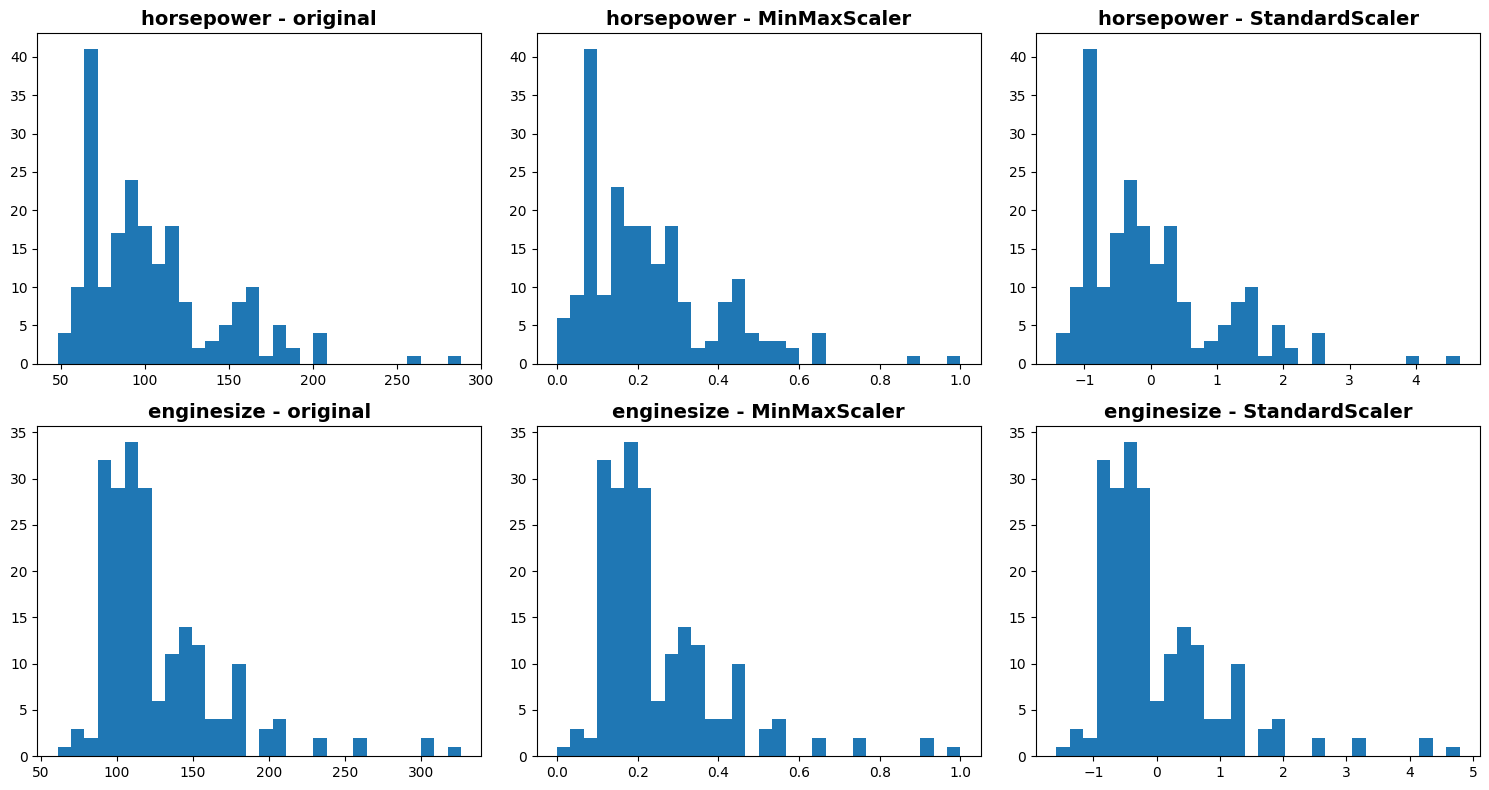

In [ ]:
# Histogramas comparativos
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Variable horsepower
axes[0,0].hist(data["horsepower"], bins=30)
axes[0,0].set_title("horsepower - original", fontsize=14, fontweight="bold")

axes[0,1].hist(data_for_min_max["horsepower_scaled"], bins=30)
axes[0,1].set_title("horsepower - MinMaxScaler", fontsize=14, fontweight="bold")

axes[0,2].hist(data_std["horsepower_scaled"], bins=30)
axes[0,2].set_title("horsepower - StandardScaler", fontsize=14, fontweight="bold")

# Variable enginesize
axes[1,0].hist(data["enginesize"], bins=30)
axes[1,0].set_title("enginesize - original", fontsize=14, fontweight="bold")

axes[1,1].hist(data_for_min_max["enginesize_scaled"], bins=30)
axes[1,1].set_title("enginesize - MinMaxScaler", fontsize=14, fontweight="bold")

axes[1,2].hist(data_std["enginesize_scaled"], bins=30)
axes[1,2].set_title("enginesize - StandardScaler", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

## Confirmar que no se han introducido inconsistencias

In [ ]:
data_for_min_max.isnull().sum()

,0
CarName,0
enginesize,0
horsepower,0
price,0
fueltype_gas,0
enginesize_scaled,0
horsepower_scaled,0


In [ ]:
print("Antes:", data.shape, "Después:", data_for_min_max.shape)

Antes: (205, 26) Después: (205, 7)


# Codificación de variables categóricas

Los modelos no entienden texto, por lo tanto:

`fueltype` → convertirlo en variables binarias (gas=1, diesel=0).

`CarName` → codificación one-hot encoding o extracción de características (marca, origen).

## `One-Hot Encoding`

In [ ]:
data_ohe = selected_data.copy()

In [ ]:
data_ohe = pd.get_dummies(data_ohe, columns=["fueltype"], drop_first=True)
data_ohe.head()

,CarName,enginesize,horsepower,price,fueltype_gas
0,alfa-romero giulia,130,111,13495.0,True
1,alfa-romero stelvio,130,111,16500.0,True
2,alfa-romero Quadrifoglio,152,154,16500.0,True
3,audi 100 ls,109,102,13950.0,True
4,audi 100ls,136,115,17450.0,True


In [ ]:
data_ohe = selected_data.copy()
data_ohe = pd.get_dummies(data_ohe, columns=["fueltype"], drop_first=False)
data_ohe.head()

,CarName,enginesize,horsepower,price,fueltype_diesel,fueltype_gas
0,alfa-romero giulia,130,111,13495.0,False,True
1,alfa-romero stelvio,130,111,16500.0,False,True
2,alfa-romero Quadrifoglio,152,154,16500.0,False,True
3,audi 100 ls,109,102,13950.0,False,True
4,audi 100ls,136,115,17450.0,False,True


## `LabelEncoder`

In [ ]:
data_le = selected_data.copy()
encoder = LabelEncoder()
data_le["fueltype"] = encoder.fit_transform(data_le["fueltype"])
data_le.head()

,CarName,fueltype,enginesize,horsepower,price
0,alfa-romero giulia,1,130,111,13495.0
1,alfa-romero stelvio,1,130,111,16500.0
2,alfa-romero Quadrifoglio,1,152,154,16500.0
3,audi 100 ls,1,109,102,13950.0
4,audi 100ls,1,136,115,17450.0


# Resumen

1. Identificar tipos de variables (numéricas, categóricas, fechas, texto).
2. Estandarizar o normalizar datos numéricos.
3. Codificar datos categóricos.
4. Crear nuevas variables relevantes.
5. Validar que los datos transformados estén listos para entrenar el modelo.


1. `MinMaxScaler`: útil en distancias y redes neuronales.

2. `StandardScaler`: útil cuando los datos tienen distribución gaussiana.

3. `One-Hot Encoding`: mejor para variables categóricas sin orden.

4. `LabelEncoder`: útil si la categoría sí tiene orden natural (bajo, medio, alto).